# Unsupervised Learning

Unsupervised learning (or clustering) is a classification method with no class labels. Clustering aims to estimate the labels of the training data.

### $k$-means clustering

We begin with a simple simulated example in which there truly are two clusters in the data: the first 25 observations have a mean shift relative to the next 25 observations.

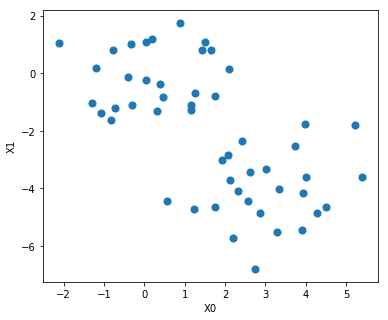

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4
f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], s=50) 
ax.set_xlabel('X0')
ax.set_ylabel('X1')

from sklearn.cluster import KMeans

We now perform K-means clustering with $k$ = 2:

In [2]:
kmeans = KMeans(n_clusters = 2, random_state = 123).fit(X)

The cluster assignments of the 50 observations are contained in kmeans.labels_:

In [3]:
print(kmeans.labels_)
#print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


The $k$-means clustering perfectly separated the observations into two clusters even though we did not supply any group information to Kmeans(). We can plot the data, with each observation colored according to its cluster assignment:

Text(0,0.5,'X1')

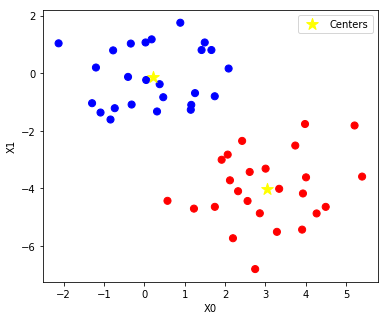

In [4]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans.labels_,\
            cmap = plt.cm.bwr) 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 150,
            color = 'yellow', 
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('X0')
plt.ylabel('X1')

Here the observations can be easily plotted because they are two-dimensional. If there were more than two variables then we could instead perform PCA and plot the first two principal components score vectors.

In this example, we knew that there really were two clusters because we generated the data. However, for real data, in general we do not know the true number of clusters. We could instead have performed $k$-means clustering on this example with $k$ = 3. If we do this, $k$-means clustering will split up the two "real" clusters, since it has no information about them:

Text(0,0.5,'X1')

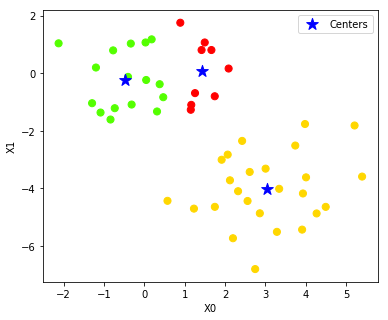

In [5]:
kmeans_3_clusters = KMeans(n_clusters = 3, random_state = 123)
kmeans_3_clusters.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans_3_clusters.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans_3_clusters.cluster_centers_[:, 0], kmeans_3_clusters.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

To run the Kmeans() function in python with multiple initial cluster assignments, we use the n_init argument (default: 10). If a value of n_init greater than one is used, then $k$-means clustering will be performed using multiple random assignments, and the Kmeans() function will report only the best results. Here we compare using n_init = 1 to n_init = 20:

In [6]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 1, \
                           random_state = 123).fit(X)
km_out_single_run.inertia_

104.52330756352504

In [8]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 20, \
                           random_state = 123).fit(X)
km_out_single_run.inertia_

98.8339527128178

Note that .inertia_ is the total within-cluster sum of squares, which we seek to minimize by performing $k$-means clustering.

### Hierarchical clustering

The linkage() function from scipy implements several clustering functions in python. In the following example we use the data from the previous section to plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure. We begin by clustering observations using complete linkage:

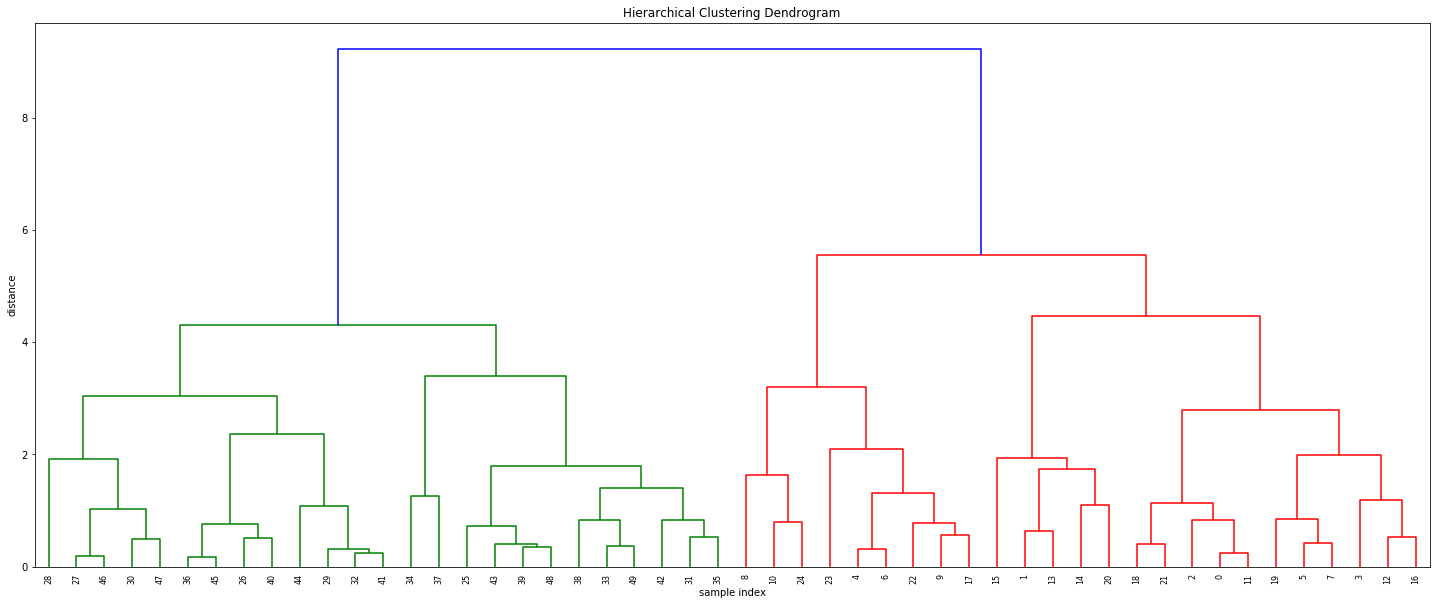

[[0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2]]


In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
hc_complete = linkage(X, "complete") #or "single" or "average"

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

from scipy.cluster.hierarchy import cut_tree
cut = cut_tree(hc_complete, n_clusters = 3)
print(cut.T)

We could just as easily perform hierarchical clustering with average or single linkage instead:

In [10]:
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

We can now plot the dendrograms obtained using the usual dendrogram() function. The numbers at the bottom of the plot identify each observation:

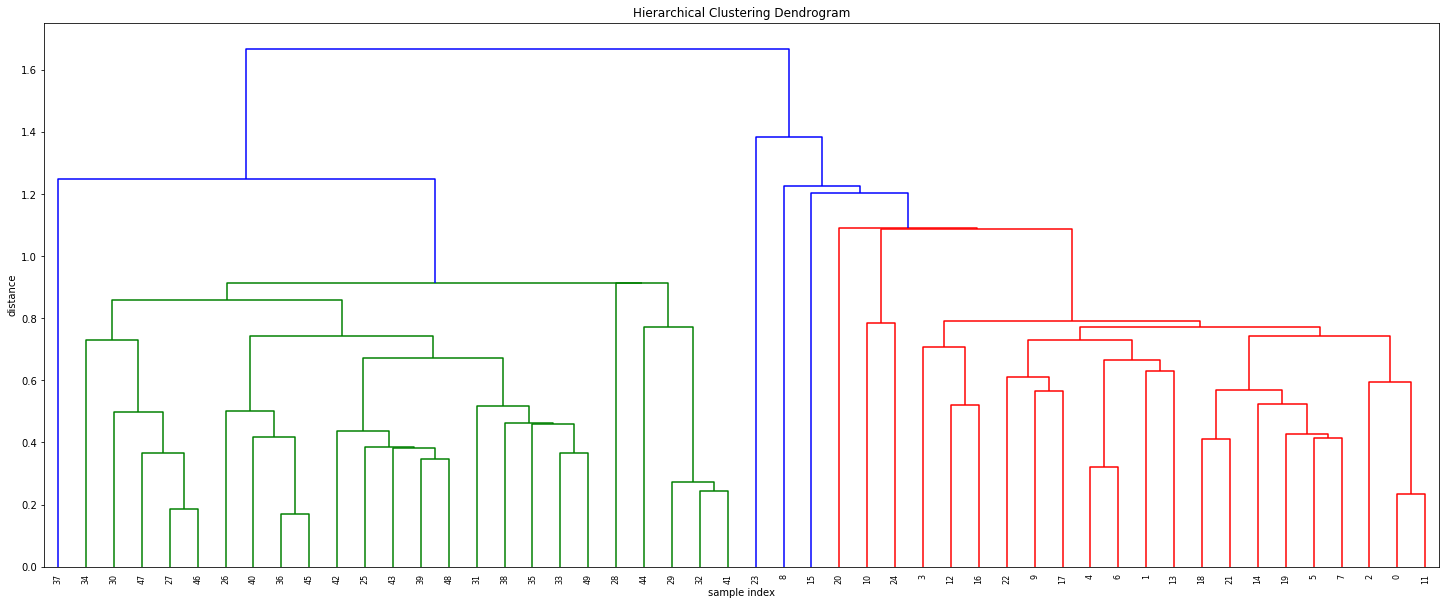

In [11]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    #hc_average,
    hc_single,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the cut_tree() function:

In [12]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete, n_clusters = 2).T) # Printing transpose just for space

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


For this data, complete and average linkage generally separates the observations into their correct groups.

### Image Processing

(-0.5, 492.5, 334.5, -0.5)

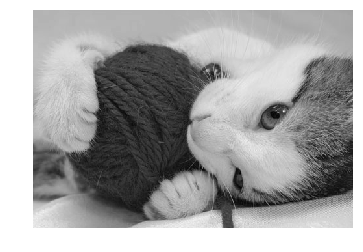

In [19]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
img = plt.imread("data/cutecat.jpg")
img_tinted = img * [.27, .72, 0.07]
cat = np.sum(img_tinted, axis=2)
plt.imshow(cat, "gray")
plt.axis("off")

(-0.5, 492.5, 334.5, -0.5)

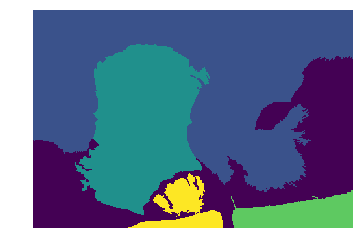

In [20]:
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering as AHC
X = np.reshape(cat, (-1, 1))

img_graph = grid_to_graph(*cat.shape)
k = 5
ward = AHC(n_clusters=k,linkage="ward", connectivity=img_graph).fit(X)
cat_segment = np.reshape(ward.labels_,cat.shape)

plt.imshow(cat_segment);
plt.axis("off")

### Zip Data

In [14]:
path='data/'
filename = path+'ziptrain.csv'
import numpy as np
zipdata = np.loadtxt("data/ziptrain.csv")
zipdata.shape

zipdata3=zipdata[zipdata[:, 0] == 3]
zipdata8=zipdata[zipdata[:, 0] == 8]

zipdata38 = np.vstack([zipdata3, zipdata8])

In [16]:
zip_kmeans = KMeans(n_clusters = 2)
zip_kmeans.fit(zipdata38)
zip_labels = zip_kmeans.labels_
zip_centers = zip_kmeans.cluster_centers_

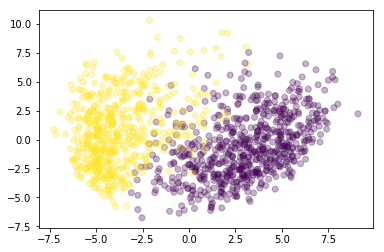

In [17]:
# Unsupervised labels
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(zipdata38[:, 1:])
Z = pca.transform(zipdata38[:,1:])
plt.scatter(Z[:,0], Z[:,1], c=zip_labels , alpha=0.3);


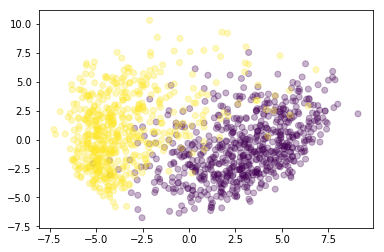

In [18]:
# Compare with true labels

plt.scatter(Z[:,0], Z[:,1], c= zipdata38[:,0], alpha=0.3);